# REF Assessment Notebook

### 31st May 2021

### Neil D. Lawrence

This notebook is a helper for reviewing ref papers.


In [1]:
import ref

In [2]:
data = ref.assess.data()

In [3]:
write_data = ref.access.upload()

In [6]:
INDEX = 239830

In [7]:
ref.assess.score(INDEX, data, write_data)

interactive(children=(Dropdown(description='index', index=260, options=(180784, 181010, 181174, 181249, 181327…

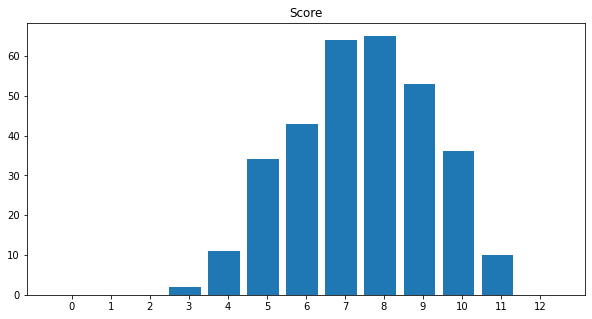

In [15]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
write_data.hist(column='Score', grid=False, bins=np.linspace(-0.5, 12.5, 14), width=0.8, ax=ax)
_ = ax.set_xticks(np.linspace(0,12,13))

In [16]:
write_data['Score'].count()

318

https://refpanelmembers-calibration.azurewebsites.net/members/Spreadsheets

In [ ]:
len(write_data['Score'])

In [34]:
0.4*842

336.8